In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder as skl
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
train = pd.read_csv('/Users/darya/Desktop/train.csv')
test = pd.read_csv('/Users/darya/Desktop/test1.csv')

In [3]:
train.head(10)
test.head(10)

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646
5,-1,6,19360756,-1,0,2569487005,2541203883,3489340674,2308170622,2967512603,...,0,0,0,0,0,0,0,3341843272,3617851689,4220791646
6,-1,7,19360762,-1,0,2569487005,2541203883,345748658,2308170622,2967512603,...,0,0,0,0,0,0,0,113033895,3617851689,4220791646
7,-1,8,19360768,-1,0,2517733175,1235983246,126861539,652481754,2116767313,...,0,0,0,0,0,0,0,516694455,3831440054,1213938795
8,-1,9,19360788,-1,0,1681988415,1830830742,639836785,2308170622,2967512603,...,0,0,0,0,1,0,0,205952515,3831440054,245608391
9,-1,10,19360790,-1,0,2949940329,2541203883,4222740218,2308170622,2967512603,...,0,0,0,0,0,0,0,1931092700,3831440054,1213938795


In [4]:
train.columns
test.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [5]:
train.isnull().sum()
test.isnull().sum()

label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64

In [6]:
train['label']= train['label'].replace(-1,0)
test['label']= test['label'].replace(-1,0)

In [7]:
train.loc[train["purchaseTime"] ==-1, 'TimeBeforePurchase?'] = 0 
train.loc[train["purchaseTime"] != -1, 'TimeBeforePurchase?'] =  train["purchaseTime"] - train["visitTime"]



In [8]:
train = train.drop({'id','visitTime','purchaseTime'}, axis = 1)
cat_list = []
for i in range(1,13):
    cat_list.append(len(train["C%d"%i].unique()))
cat_list

[22595, 8, 2863, 4, 3, 84, 6, 23, 60, 28653, 21, 19]

In [9]:
train = train.drop({"C1","C10"}, axis=1)



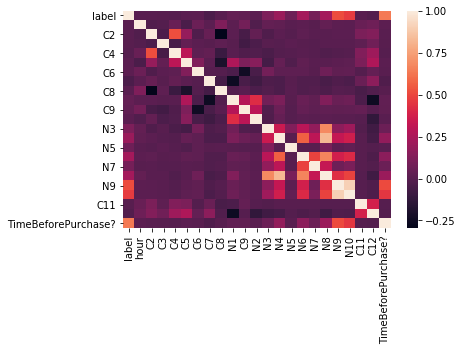

In [10]:
corr = train.corr()
sns.heatmap(corr)

In [11]:
train = train.drop({"C4","N4","N8"}, axis = 1) 

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

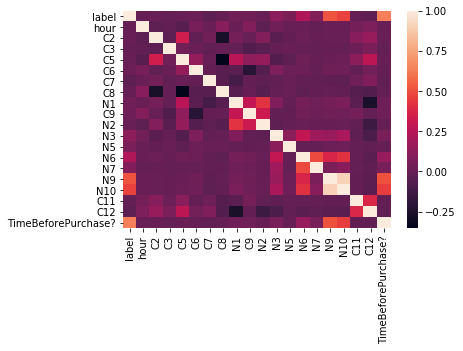

In [13]:
train["C5"] = label_encoder.fit_transform(train.iloc[:,4]).astype('int')
train["C2"] = label_encoder.fit_transform(train.iloc[:,2]).astype('int')
train["C3"] = label_encoder.fit_transform(train.iloc[:,3]).astype('int')
train["C6"] = label_encoder.fit_transform(train.iloc[:,5]).astype('int')
train["C7"] = label_encoder.fit_transform(train.iloc[:,6]).astype('int')
train["C8"] = label_encoder.fit_transform(train.iloc[:,7]).astype('int')
train["C9"] = label_encoder.fit_transform(train["C9"]).astype('int')
train["C11"] = label_encoder.fit_transform(train["C11"]).astype('int')
train["C12"] = label_encoder.fit_transform(train["C12"]).astype('int')
corr2 = train.corr()
sns.heatmap(corr2)
train = train.drop({"N9"}, axis = 1) 

In [14]:
test.loc[test['purchaseTime'] ==-1, 'TimeBeforePurchase?'] = 0 
test.loc[test['purchaseTime'] != -1, 'TimeBeforePurchase?'] =  test["purchaseTime"] - test["visitTime"]



In [15]:
test_id = test.iloc[:,1]
test = test.drop({'id','visitTime','purchaseTime'}, axis = 1)
test = test.drop({"C1","C10","C4","N4","N8", "N9"}, axis=1)

In [16]:
test["C5"] = label_encoder.fit_transform(test.iloc[:,4]).astype('int')
test["C2"] = label_encoder.fit_transform(test.iloc[:,2]).astype('int')
test["C3"] = label_encoder.fit_transform(test.iloc[:,3]).astype('int')
test["C6"] = label_encoder.fit_transform(test.iloc[:,5]).astype('int')
test["C7"] = label_encoder.fit_transform(test.iloc[:,6]).astype('int')
test["C8"] = label_encoder.fit_transform(test.iloc[:,7]).astype('int')
test["C9"] = label_encoder.fit_transform(test["C9"]).astype('int')
test["C11"] = label_encoder.fit_transform(test["C11"]).astype('int')
test["C12"] = label_encoder.fit_transform(test["C12"]).astype('int')

In [17]:
len(train["label"])
sum(train["label"])
train.head()

,label,hour,C2,C3,C5,C6,C7,C8,N1,C9,N2,N3,N5,N6,N7,N10,C11,C12,TimeBeforePurchase?
0,0,0,3,2822,1,71,3,13,0,59,0,0,0,0,0,0,19,18,0.0
1,0,0,0,817,1,5,3,0,1,41,0,1,0,0,0,0,20,4,0.0
2,0,0,0,1262,1,35,3,16,0,44,0,0,0,0,0,0,14,6,0.0
3,0,0,0,181,1,0,3,16,0,45,0,0,0,0,0,0,19,18,0.0
4,0,0,0,448,1,14,3,0,0,26,0,0,0,0,0,0,19,18,0.0


In [18]:
label = train.label
features = train.drop('label', axis=1)

In [19]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=123)

In [20]:
X_train, y_train=os.fit_sample(features, label)

X_train = preprocessing.scale(X_train)

model = LogisticRegression().fit(X_train, y_train)

In [21]:
test1= test.iloc[:,1:20]
predictions = model.predict_proba(test1)[:,1]
y_pred = model.predict(test1)

In [22]:
sum(y_pred)
len(y_pred)

32086

In [23]:
final_table = [test_id, predictions]
final_table= pd.DataFrame({"id_client" :test_id, "predicted_prob" :predictions})

In [24]:
final_table.to_csv('197056_assignment2_3.csv', index=False)